In [2]:
# Functions used in this notebook =======================================

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def median(lst):
    return np.median(np.array(lst))

_range = lambda *l: max(l) - min(l)

def iqr_sets(l):
    """ Splits the set in on the median depending on whether the size is even or odd.
        NOTE: In all cases the median is omitted """

    S = sorted(l)
    if (len(S) % 2 == 0):
        # Split the dataset into two buckets (each containing 2 quartiles)
        Su = S[len(S) / 2:]
        St = S[:len(S) / 2]
    else:
        s_median = median(l)

        # Split by the median and omit it
        Su = S[S.index(s_median) + 1:]
        St = S[:S.index(s_median)]
    return (Su, St)

def iqr(*l):
    """ implementation of Interquartile Range
    """
    # Get our pairs of quartiles
    Su, St = iqr_sets(l)
        
    # Find the median of each bucket (median(q1, q2), median(q3, q4))
    su_median, st_median = median(Su), median(St)
    return (su_median - st_median)

def draw_box_and_whisker(d):
    plt.boxplot(d, 0, 'rs', 0)

    # Add some space around the graph
    plt.xticks(range(min(d) -1, max(d) + 2))
    plt.yticks([])
    plt.xlabel("x100 tickets sold daily")
    plt.figure()
    plt.show()
    
# =======================================================================

## Why the Box and Whisker plot?
###### [Statistics Canada](http://www.statcan.gc.ca/edu/power-pouvoir/ch12/5214889-eng.htm), "Constructing box and whisker plots", _Statistics: Power from Data! Box and Whisker plots_, April 3, 2001

A _box and whisker plot_ (sometimes called a boxplot) is a graph that presents information from a five-number summary. It does not show a distribution in as much detail as a stem and leaf plot or histogram does, but is especially useful for indicating whether a distribution is skewed and whether there are potential unusual observations (outliers) in the data set. Box and whisker plots are also very useful when large numbers of observations are involved and when two or more data sets are being compared.

Box and whisker plots are ideal for comparing distributions because the centre, spread and overall range are immediately apparent. A box and whisker plot is a way of summarizing a set of data measured on an interval scale. It is often used in explanatory data analysis. This type of graph is used to show the shape of the distribution, its central value, and its variability.

## Reading a Box and Whisker plot:
In a box and whisker plot:
  - the ends of the box are the upper and lower quartiles, so the box spans the interquartile range
  - the median is marked by a vertical line inside the box
  - the whiskers are the two lines outside the box that extend to the highest and lowest observations.
  

## Creating "Box and Whisker" plots

Let's say we have the dataset _S_, representing the number of tickets sold daily for a popular vampire movie during the month of December. The box plot below shows the data for the number of tickets sold, in hundreds.

```
S = 5,2,10,6,2,8,8,1,2,5,7,3,3,4
```
This can be represented by the following:

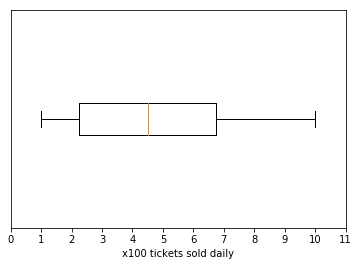

In [4]:
S = [5,2,10,6,2,8,8,1,2,5,7,3,3,4]
draw_box_and_whisker(S)

Let's try to recreate the result's of the five-number summary of the box and whiskers plot. Let's solve for the edges of the box first (the upper/lower quartiles)

In [5]:
# get the sets making up the interquartile range of S (Su + St = igr(S))
Su, St = iqr_sets(S)

higher = median(Su) # q3, right-most edge of box
lower = median(St)  # q1, left-most edge of box

print("Interquartile range of S: %s" % iqr(*S))
print ("Higher Quartel: %s\nLower Quartel: %s" % (higher, lower))

Interquartile range of S: 5.0
Higher Quartel: 7.0
Lower Quartel: 2.0


We can see here that the quartels satisfy the Interquartile Range of S:

```
iqr(S) = su_median - st_median
```

or

```
IQR = Q3 - Q1
```

In [6]:
# Get the median of S (Red line)
med = median(S) # Q2

print "Median of S:", med

Median of S: 4.5


In [13]:
# Get the left and right whiskers (highest/lowest observations)
highest_ob = max(S)
lowest_ob = min(S)

print "Highest data point: ", highest_ob, " \nLowest data point: ", lowest_ob

Highest data point:  10  
Lowest data point:  1


All together that gives us our 5 number summary! More importantly, they all match our plot! We now could take this information and construct our own boxplot.

|                    |      |
|--------------------|------|
| Higher Quartel     | 7.0  |
| Lower Quartel      | 2.0  |
| Median of S        | 4.5  |
| Highest data point |  10  | 
| Lowest data point  |  1   | 

Finally, let's wrap that all up in a function to extract a summary from a dataset:

In [8]:
def get_summary(l):
    Su, St = iqr_sets(l)

    lower = median(St)  # Q1, lowest data spread
    med = median(l)     # Q2, middle of spread
    higher = median(Su) # Q3, highest data spread
    higest_data_point = max(l)
    lowest_data_point = min(l)
    
    return lower, med, higher, higest_data_point, lowest_data_point

get_summary(S)

(2.0, 4.5, 7.0, 10, 1)


## Interpreting box plots

Continuing with our example, lets say the set _X_ represent's the _5 number result summary_ of _S_

```
X = 2, 4.5, 7, 10, 1
```

Here is the boxplot representing X:

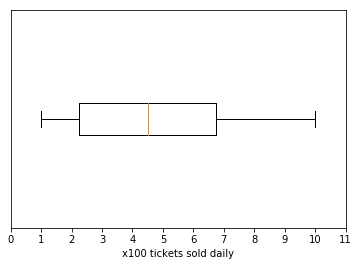

In [15]:
draw_box_and_whisker(S)

X = [2, 4.5, 7, 10, 1]

Note: You can recreate this plot directly from the result summary too:

[10, 4.5, 4.5, 6, 6, 7, 7, 8.5]


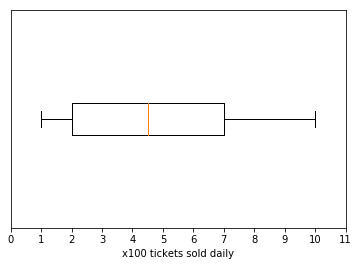

In [20]:
def expand_summary(s):
    lower, med, higher, highest_data_point, lowest_data_point = s
    ds = []
    # Expand into an even dataset
    ds.append(lowest_data_point)
    ds.append(lower)
    ds.append(lower)
    ds.append(med)
    ds.append(med)
    ds.append(higher)
    ds.append(higher)
    ds.append(highest_data_point)
    
    return ds

print(expand_summary(s))
draw_box_and_whisker(expand_summary(X))

## Examples:

Find the interquartile range (IQR) of the data in the summary below.

_Hint: IQR = Q3 - Q1_

In [9]:
s = [6, 7, 8.5, 10, 4.5] # Summary
lower, med, higher, higherst_data_point, lowest_data_point = s

iqr = higher - lower 
print "The IQR of %s is %s" % (s, iqr)

s = [5,6,8,22,25]
lowest_data_point, lower, med, higher, higherst_data_point = s
iqr = higher - lower
print "The IQR of %s is %s" % (s, iqr)

s = [2.5,4,6.5,7,8.5]
lowest_data_point, lower, med, higher, higherst_data_point = s
iqr = higher - lower
print "The IQR of %s is %s" % (s, iqr)

The IQR of [6, 7, 8.5, 10, 4.5] is 2.5
The IQR of [5, 6, 8, 22, 25] is 16
The IQR of [2.5, 4, 6.5, 7, 8.5] is 3


Find the range of the data in the summary below.

_Hint: Range = Max − Min_

In [10]:
s = [4.5, 6, 7, 8.5, 10]
lowest_data_point, lower, med, higher, higherst_data_point = s
r = higherst_data_point - lowest_data_point
print "The range of %s is %s" % (s, r)

The range of [4.5, 6, 7, 8.5, 10] is 5.5
